In [1]:
import numpy as np
import cvxpy as cp
import osbdo as ob

(CVXPY) Oct 12 10:00:42 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.1 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
ms = [20,30,40,25,35]
ns = [30,40,25,35,20]
params = ob.sc_params(ms, ns)

# Distributed solution

In [3]:
agents = ob.sc_agents(params)
g = ob.sc_coupling(params, agents)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=150)

k=0, rel_gap=inf, L=-2050.0690181044574, U=4465.519175417394
k=1, rel_gap=inf, L=-1545.3235969980515, U=4465.519175417394
k=2, rel_gap=inf, L=-1369.4608885689877, U=2848.880243441141
k=3, rel_gap=inf, L=-1262.2633406768828, U=2179.0202651882187
k=4, rel_gap=inf, L=-907.0048391424707, U=1100.3631085406728
k=5, rel_gap=inf, L=-714.8795928617728, U=475.5613695896527
k=6, rel_gap=inf, L=-600.214403309403, U=298.52597599100386
k=7, rel_gap=inf, L=-546.4496238012193, U=208.5381735032604
k=8, rel_gap=inf, L=-488.9564224199494, U=84.72265450241343
k=9, rel_gap=inf, L=-429.17549038693573, U=84.72265450241343
k=10, rel_gap=inf, L=-355.5996324274611, U=58.207209615690545
k=11, rel_gap=inf, L=-328.46885102459737, U=1.6832743829219794
k=12, rel_gap=inf, L=-289.1805890234932, U=1.6832743829219794
k=13, rel_gap=81.64999444818515, L=-235.46896935666177, U=-2.848989536282204
k=14, rel_gap=3.996428593430976, L=-216.594644149229, U=-43.349892848262755
k=15, rel_gap=3.691982819325595, L=-203.3969524636543

k=108, rel_gap=0.005200348946391674, L=-84.7112331945566, U=-84.2729842696009
k=109, rel_gap=0.004980717162583968, L=-84.69272416869467, U=-84.2729842696009
k=110, rel_gap=0.004509622558308809, L=-84.65453922239271, U=-84.27449306736608
k=111, rel_gap=0.004381033268440938, L=-84.6437024251752, U=-84.27449306736608
k=112, rel_gap=0.004189930763394639, L=-84.6300359240247, U=-84.27692145816295
k=113, rel_gap=0.0035028733626319324, L=-84.57379467516171, U=-84.27857749102787
k=114, rel_gap=0.003351898110842325, L=-84.56107069570453, U=-84.27857749102787
k=115, rel_gap=0.002983721085196786, L=-84.53004125971825, U=-84.27857749102787
k=116, rel_gap=0.0029642976422910535, L=-84.52840427958017, U=-84.27857749102787
k=117, rel_gap=0.0029488470434720607, L=-84.52710212509032, U=-84.27857749102787
k=118, rel_gap=0.0028918356265326245, L=-84.52229728396992, U=-84.27857749102787
k=119, rel_gap=0.0027849698544788306, L=-84.5176996971104, U=-84.28297415484334
k=120, rel_gap=0.002709633580482776, L=-8

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:154: UserWarning: Objective contains too many subexpressions. Consider vectorizing your CVXPY code to speed up compilation.
  warnings.warn("Objective contains too many subexpressions. "


k=143, rel_gap=0.0009622320507682483, L=-84.39084771449006, U=-84.30972219760017
k=144, rel_gap=0.0008868692669644305, L=-84.38449389912353, U=-84.30972219760017
k=145, rel_gap=0.0008275377066097763, L=-84.37949167175248, U=-84.30972219760017
k=146, rel_gap=0.0008229306084068624, L=-84.37910324858285, U=-84.30972219760017
k=147, rel_gap=0.0008174998122512522, L=-84.37864537966766, U=-84.30972219760017
k=148, rel_gap=0.0008127921444956484, L=-84.37824847750699, U=-84.30972219760017
k=149, rel_gap=0.0007788067777416078, L=-84.37595458325632, U=-84.31029315551342


# Centralized solution

In [5]:
h_cvx, x_cvx, prob_cvx = ob.cvx_supply_chain(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(-84.32112731898656, -84.31029315551342)

# Plot

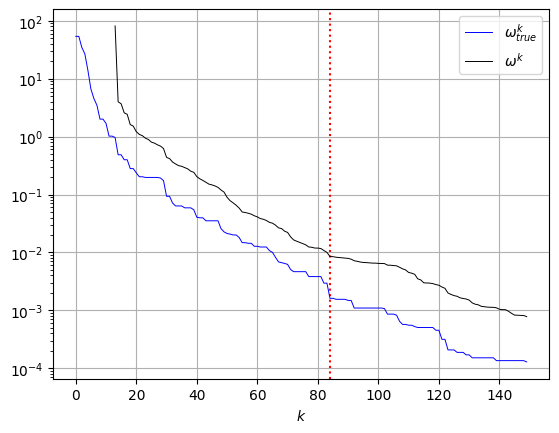

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)